In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install tabgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 629.3 kB/s eta 0:00:00


In [ ]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from tabgan.sampler import OriginalGenerator, GANGenerator
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import time
from tqdm import tqdm
from sklearn.model_selection import KFold




# load ARFF file
#data, meta = arff.loadarff('data.arff')
data, meta = arff.loadarff('/content/drive/MyDrive/ML/CS 4641 ML Project/Tabular Data/data.arff')

# convert to pandas DataFrame
df = pd.DataFrame(data)

df.head()


/usr/local/lib/python3.10/dist-packages/_ctgan/synthesizer.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4.0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1.0,1.085714,0.433013,0.437059,29.0
1,5.0,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2.0,1.128571,0.632456,0.468606,26.0
2,4.0,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1.0,1.114286,0.433013,0.444697,19.0
3,4.0,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1.0,1.100000,0.433013,0.440952,22.0
4,4.0,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1.0,1.057143,0.433013,0.428809,23.0


In [ ]:
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4.0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1.0,1.085714,0.433013,0.437059,29.00
1,5.0,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2.0,1.128571,0.632456,0.468606,26.00
2,4.0,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1.0,1.114286,0.433013,0.444697,19.00
3,4.0,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1.0,1.100000,0.433013,0.440952,22.00
4,4.0,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1.0,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4.0,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1.0,2.168889,0.433013,0.496904,2.44
21259,5.0,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1.0,0.904762,0.400000,0.212959,122.10
21260,2.0,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1.0,3.200000,0.500000,0.400000,1.98
21261,2.0,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1.0,2.210000,0.500000,0.462493,1.84


In [ ]:
# Check for missing values
df.isnull().sum().sum()

0

In [ ]:
# split the data into features (X) and target variable (y)
X = df.drop(columns=['critical_temp'])
y = df['critical_temp']

# split the data into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((14884, 81), (6379, 81))

In [ ]:
# perform Lasso feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# get the feature names
feature_names = np.array(X.columns)

# features with non-zero coefficients
selected_features_lasso = feature_names[lasso.coef_ != 0]

selected_features_lasso

array(['range_atomic_mass', 'range_fie', 'range_atomic_radius',
       'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density',
       'range_Density', 'wtd_range_Density', 'std_Density',
       'wtd_std_Density', 'gmean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'wtd_mean_ThermalConductivity',
       'wtd_std_ThermalConductivity'], dtype=object)

In [ ]:
# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# perform PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

X_train_pca.shape

(14884, 17)

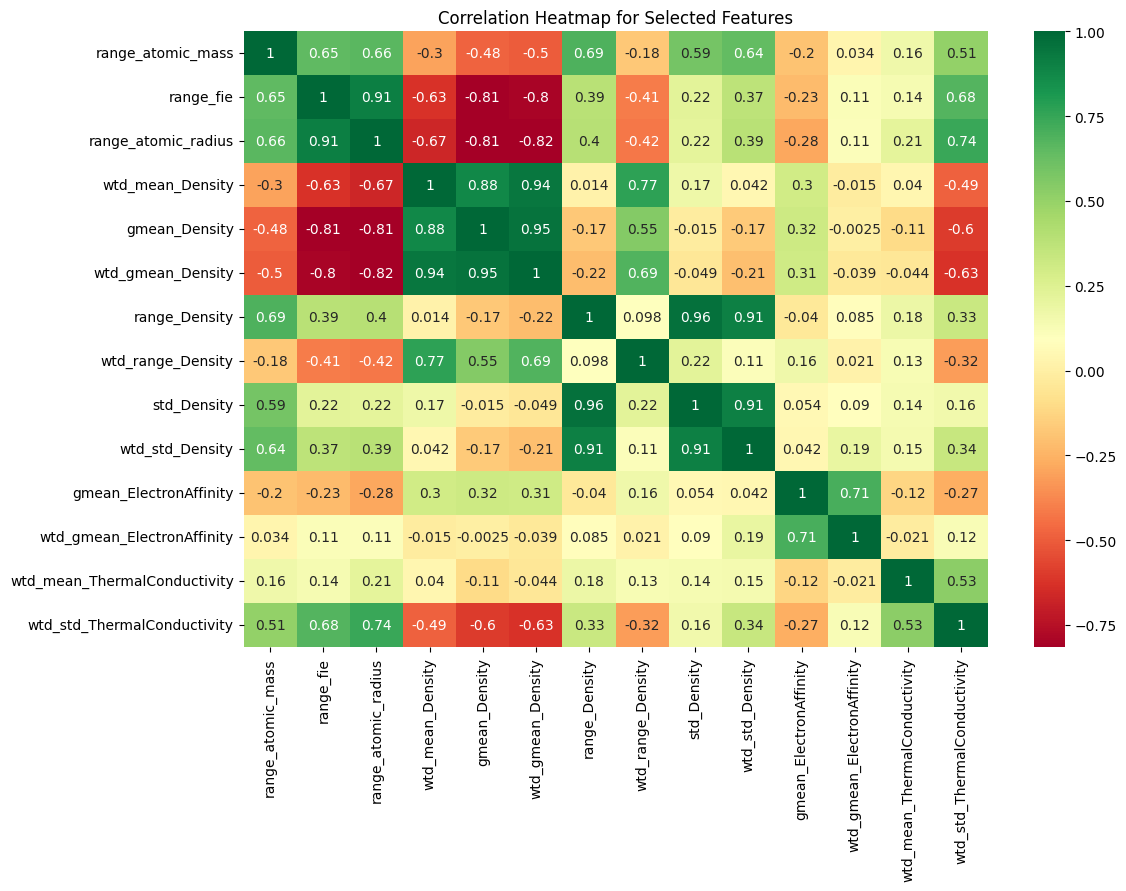

In [ ]:
# Correlation matrix with Heatmap for selected features
selected_features = selected_features_lasso.tolist()
corrmat = X_train[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap for Selected Features")
plt.show()

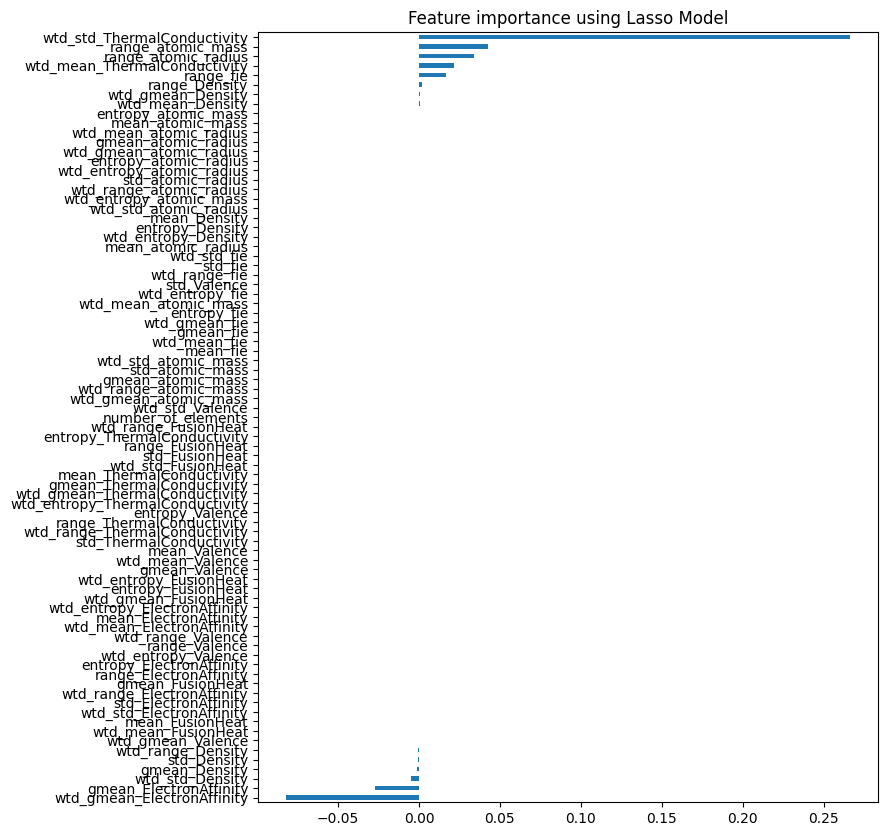

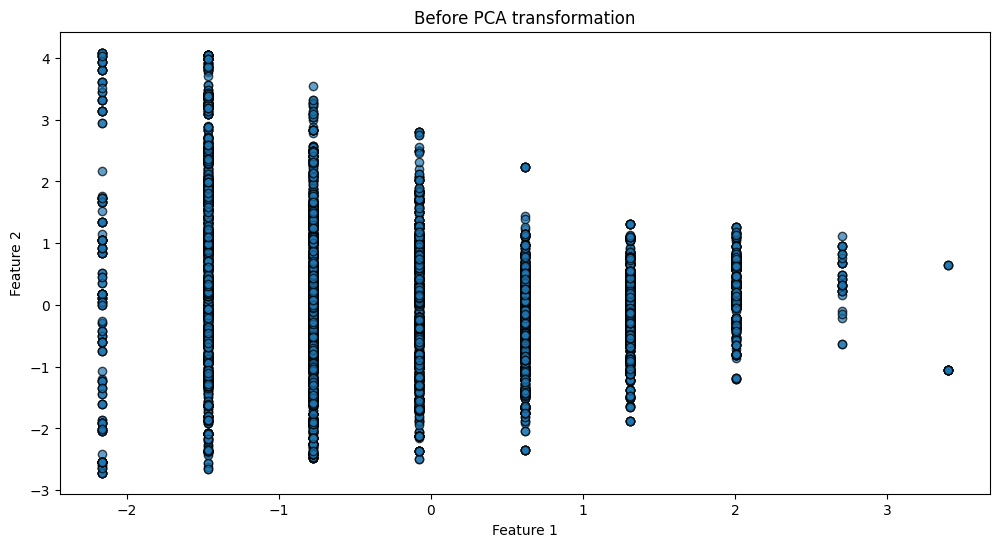

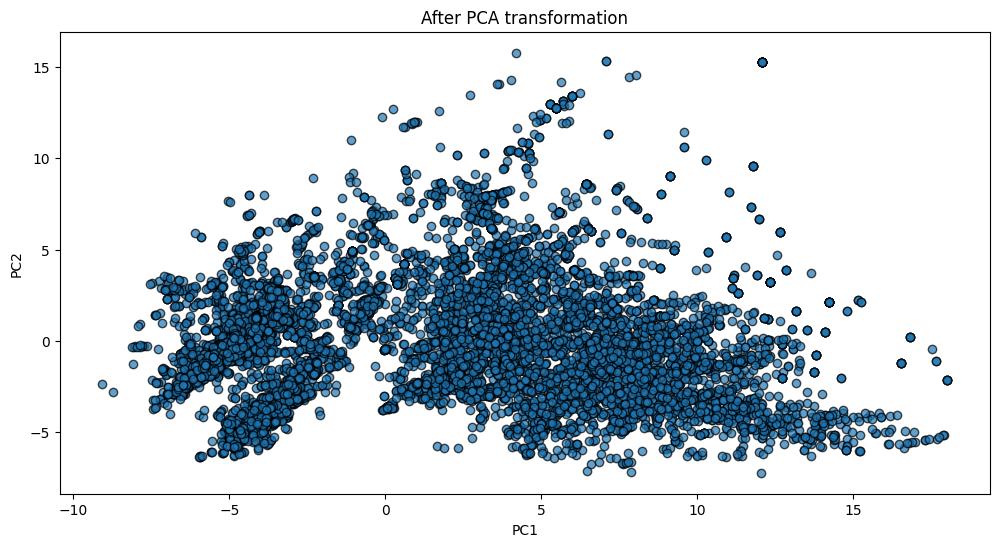

In [ ]:
# Feature importance using Lasso Model
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.figure(figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

# Visualizing before PCA transformation
plt.figure(figsize=(12, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], edgecolor='k', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before PCA transformation')
plt.show()

# Visualizing after PCA transformation
plt.figure(figsize=(12, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], edgecolor='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('After PCA transformation')
plt.show()

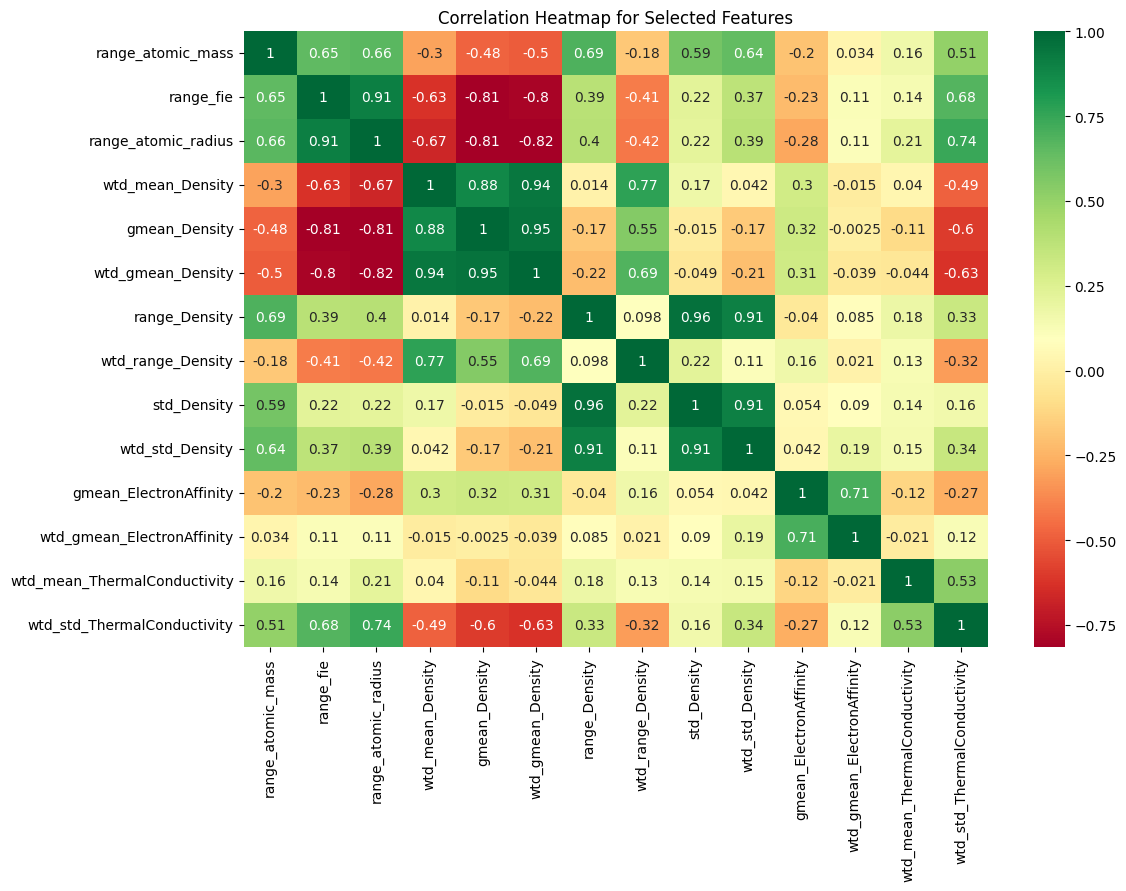

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['critical_temp'])
y = df['critical_temp']

# Split the data into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform Lasso feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Get the feature names
feature_names = np.array(X.columns)

# Features with non-zero coefficients
selected_features_lasso = feature_names[lasso.coef_ != 0]

# Scale the numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fill the missing values with column means
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Convert back to DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Correlation matrix with Heatmap for selected features
selected_features = selected_features_lasso.tolist()
corrmat = X_train_imputed[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap for Selected Features")
plt.show()

In [ ]:
# from sklearn.impute import SimpleImputer

# # creating an imputer
# imputer = SimpleImputer()

# # Fill the missing values with column means
# X_train_imputed = imputer.fit_transform(X_train_nan)

# # convert back to DataFrame
# X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# # check again for missing values
# X_train_imputed.isnull().sum().sum()

In [ ]:
# save the original data to a .csv file
df.to_csv('original_data.csv', index=False)

# concatenate the cleaned features and target for the training data
cleaned_data = pd.concat([X_train_imputed, y_train.reset_index(drop=True)], axis=1)

# save the cleaned data to a .csv file
cleaned_data.to_csv('cleaned_data.csv', index=False)

In [ ]:
X = cleaned_data.drop(columns= 'critical_temp')
y = cleaned_data['critical_temp']

y = pd.DataFrame(y)

#split the data into training and testing sets (70:30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Means for selecting most important features via reduced feature extraction using the XGBooost algorithm

In [ ]:


# from sklearn.feature_selection import RFE
# from tqdm import tqdm

# # Define step size and search space
# step = 5
# max_features = X_train.shape[1]
# min_features = 5
# search_space = range(min_features, max_features, step)

# # List to store RMSE
# rmse = []

# # Perform RFE for different number of features
# for n_features in tqdm(search_space):
#     # RFE to select n_features
#     selector = RFE(estimator=XGBRegressor(),
#                    n_features_to_select=n_features,
#                    step=step)
#     selector.fit(X_train, y_train)

#     # Predict on feature subset and store prediction
#     y_pred = selector.predict(X_test)
#     rmse.append(mean_squared_error(y_test, y_pred, squared=False))

# # Plot RMSE against number of features
# plt.figure(figsize=(10, 6))
# plt.plot(search_space, rmse, marker='o')
# plt.xlabel('Number of features')
# plt.ylabel('Root Mean Squared Error')
# plt.title('RMSE of predictions based on number of features, determined by recursive feature elimination')
# plt.show()

# # Display the rankings
# rankings = selector.ranking_
# features = X_train.columns.tolist()
# ranking_with_features = sorted(zip(rankings, features))

# # Select the top 20 features
# top_15_features = [feature for rank, feature in ranking_with_features[:15]]

# print("Top 15 features:")
# print(top_15_features)

# # Update X_train and X_test to only include the top 20 features
# X_train = X_train[top_15_features]
# X_test = X_test[top_15_features]

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X = df.drop(columns=['critical_temp'])
y = df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso = LassoCV(cv=10, random_state=42).fit(X_train, y_train)


feature_names = np.array(X.columns)

selected_features_lasso = feature_names[lasso.coef_!= 0]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features_lasso])

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_scaled)


pca = PCA(n_components=0.97, random_state=42)
X_train_pca = pca.fit_transform(X_train_imputed)


X_train_pca_df = pd.DataFrame(X_train_pca)

cleaned_data = pd.concat([X_train_pca_df, y_train.reset_index(drop=True)], axis=1)

cleaned_data.to_csv('cleaned_data.csv', index=False)

print(X_train_pca_df)
X = cleaned_data.drop(columns= 'critical_temp')
y = cleaned_data['critical_temp']

y = pd.DataFrame(y)

#split the data into training and testing sets (70:30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

              0         1         2         3         4         5         6  \
0      3.576819  1.210656 -0.527541  0.363681 -0.127224 -1.240062 -0.623420   
1     -1.629954  0.044846 -0.768224  2.382290  0.129481 -0.189376  0.422117   
2      1.279634 -0.702713 -0.770206 -0.374270 -0.733287 -0.776277  0.294430   
3      3.456528 -0.240656 -2.143319 -1.183730  0.715382  0.871968 -0.839296   
4      4.822383 -1.194102  0.542813  0.599857  1.068997 -0.266787  0.219443   
...         ...       ...       ...       ...       ...       ...       ...   
14879  1.861177 -3.895436 -2.506585  1.366785 -2.151306 -1.201557  1.041146   
14880  3.683670  4.569852  1.132520  0.348276 -1.654493  0.989250 -0.026823   
14881 -2.194650 -0.355674  0.093443  0.636316  0.270220  0.262542 -0.336228   
14882 -1.581306 -0.132104  1.640346 -0.047978  0.231144  0.007076 -0.121739   
14883  2.490210 -2.201906  1.662851 -0.725807  1.018054  0.449064 -0.024684   

              7  
0      0.114674  
1      0.581023

((10418, 8), (4466, 8), (10418, 1), (4466, 1))

In [ ]:
#k fold Cross Validation helper
def k_fold_cross_validation(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model
        score = model.score(X_test, y_test)
        scores.append(score)

    return scores

In [ ]:
#For Tabular Data
#Using a Random Forest on mixures of sythentic and original data
# Split the dataset into input features (X) and target variable (y)
X = cleaned_data.drop(columns=['critical_temp'])
y = cleaned_data['critical_temp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regression model
model = RandomForestRegressor(max_depth=20, random_state=42)

#perform K Fold Cross Validation
scores = k_fold_cross_validation(model, X, y)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse + 4)
#K Fold Scores
adr = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adr)
print("Average R2 score:", np.mean(scores))

Mean Squared Error: 123.22744842586347
Root Mean Squared Error: 15.100785937304776
0.9510847219217644
Average R2 score: 0.9004617782212817


In [ ]:
#Linear Regression
# Define target and potential features
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
target = 'critical_temp'
features = list(df.columns)
features.remove(target)
# features.remove('material')

# Input and output values
X12 = df[features]
y12 = np.log10(df[target]) # log scale forces values to always be positive and non-zero

# Train/test split
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X12, y12, test_size=0.2, shuffle=True)

# Scale
s = MinMaxScaler()
s.fit(X_train_unscaled)
X_train = s.transform(X_train_unscaled)
X_test = s.transform(X_test_unscaled)
# Initiate and fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_linear)

Mean Squared Error: 0.1302263928723724


In [ ]:
gan_gen1 = GANGenerator(gen_x_times = 0.25)
gan_gen2 = GANGenerator(gen_x_times = 0.50)
gan_gen3 = GANGenerator(gen_x_times = 0.75)

synthetic_data1, synthetic_target1 = gan_gen1.generate_data_pipe(X_train, y_train, X_test)
synthetic_data2, synthetic_target2 = gan_gen2.generate_data_pipe(X_train, y_train, X_test)
synthetic_data3, synthetic_target3 = gan_gen3.generate_data_pipe(X_train, y_train, X_test)

# X_train = pd.concat([X_train_imputed, synthetic_data])
# y_train = pd.concat([y_train, synthetic_target])

Feature Seleciton and More Cleaning

In [ ]:
# #For Tabular Data
# #Using a Random Forest on synthetic split data

# # Split the dataset into input features (X) and target variable (y)
# # X = cleaned_data.drop(columns=['critical_temp'])
# # y = cleaned_data['critical_temp']

# # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train1 = pd.concat([X_train_imputed, synthetic_data1])
# y_train1 = pd.concat([y_train, synthetic_target1])
# X_train2 = pd.concat([X_train_imputed, synthetic_data2])
# y_train2 = pd.concat([y_train, synthetic_target2])
# X_train3 = pd.concat([X_train_imputed, synthetic_data3])
# y_train3 = pd.concat([y_train, synthetic_target3])
# # Initialize the Random Forest Regression model
# model = RandomForestRegressor(max_depth=20, random_state=42)

# #perform K Fold Cross Validation
# scores = k_fold_cross_validation(model, X, y)

# # Train the model on the synthetic splits and make predictions on the test data
# model.fit(X_train1, y_train1)
# y_pred1 = model.predict(X_test)
# model.fit(X_train2, y_train2)
# y_pred2 = model.predict(X_test)
# model.fit(X_train3, y_train3)
# y_pred3 = model.predict(X_test)
# # Make predictions on the test data
# # y_pred = model.predict(X_test)

# # Evaluate the model using Mean Squared Error (MSE)
# mse1 = mean_squared_error(y_test1, y_pred1)
# print("Mean Squared Error for first split:", mse1)
# mse2 = mean_squared_error(y_test2, y_pred2)
# print("Mean Squared Error for second split:", mse2)
# mse3 = mean_squared_error(y_test3, y_pred3)
# print("Mean Squared Error for third split:", mse3)
# #K Fold Scores
# print("Average R2 score:", np.mean(scores))


In [ ]:
#K fold accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(scores, marker='o', label='K fold Scores')
plt.yscale('linear')
plt.xlabel('Fold Number')
plt.ylabel('K fold value')
plt.title('Varience Visualizer accross K Folds')
plt.legend()
plt.show()
# #Bar graph of mse scores first original data then 25%, 50%, 75%
# plt.figure(figsize=(10,5))
# categories = ['Original Data', '25% Synthetic', '50% Synthetic', '75% Synthetic']
# values = [mse, mse1, mse2, mse3]
# plt.bar(categories, values)
# plt.xlabel('Data Type')
# plt.ylabel('MSE Values')
# plt.title('MSE Values Accross Synthetic Data')
# plt.legend()
# plt.show()
# #MSE values Linear vs Random forest on Original Data
# plt.figure(figsize=(10, 5))
# categories = ['Linear MSE', 'Random Forest MSE']
# values = [mse_linear, mse]
# plt.bar(categories, values)
# plt.xlabel('Data Type')
# plt.ylabel('MSE Values')
# plt.title('Linear and Random Forest MSE Values')
# plt.legend()
# plt.show()

In [ ]:

# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LassoCV
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# import seaborn as sns

# # load the original data
# df = pd.read_csv('Travel_Times.csv')

# # define categorical and numerical columns
# categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # handle missing data
# for column in categorical_cols:
#     df[column].fillna('Unknown', inplace=True)

# imputer = SimpleImputer(strategy='median')
# df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


# for column in categorical_cols:
#     top10 = df[column].value_counts().index[:10]
#     df[column] = np.where(df[column].isin(top10), df[column], 'Other')

# df = pd.get_dummies(df, columns=categorical_cols)

# # scale the numerical columns
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# # correlation matrix with Heatmap for selected features
# selected_features = ['Destination Movement ID', 'Mean Travel Time (Seconds)', 'Range - Lower Bound Travel Time (Seconds)', 'Range - Upper Bound Travel Time (Seconds)']
# corrmat = df[selected_features].corr()
# plt.figure(figsize=(12,8))
# sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
# plt.title("Correlation Heatmap for Selected Features")
# plt.show()

# # apply LASSO
# lasso = LassoCV()
# lasso.fit(df[selected_features], df['Mean Travel Time (Seconds)'])
# coef = pd.Series(lasso.coef_, index = df[selected_features].columns)
# imp_coef = coef.sort_values()
# imp_coef.plot(kind = "barh")
# plt.title("Feature importance using Lasso Model")
# plt.show()

# # apply PCA
# pca = PCA(n_components=2)
# df_pca = pd.DataFrame(pca.fit_transform(df[selected_features]), columns=['PC1', 'PC2'])

# # visualizing before PCA transformation
# plt.figure(figsize=(12, 6))
# plt.scatter(df[selected_features[0]], df[selected_features[1]], edgecolor='k', alpha=0.7)
# plt.xlabel(selected_features[0])
# plt.ylabel(selected_features[1])
# plt.title(f'Before PCA transformation')
# plt.show()

# # visualizing the PCA transformation
# plt.figure(figsize=(12, 6))
# plt.scatter(df_pca['PC1'], df_pca['PC2'], edgecolor='k', alpha=0.7)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title(f'After PCA transformation')
# plt.show()

In [ ]:
Comparing XGBoost to Random Forest

Code for XGBoost and LightGBM Model (test data, not actual data)

In [ ]:
# Configuration
min_samples = 1000
max_samples = X_train.shape[0]
step = 500
kfolds = 5
r2_threshold = 0.85  # Stop when the average adjusted R^2 is 0.85 or higher

# Dictionaries to store metrics
xgb_metrics = {"sample_size": [], "runtime": [], "avg_rmse": [], "avg_adj_r2": []}

for sample_size in range(min_samples, max_samples + 1, step):
    xgb = XGBRegressor(random_state=42, max_depth=6, n_jobs=-1)

    # Create subset of the data of custom sample size
    X_temp, _, y_temp, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=42)

    # Set up k-fold cross-validation
    kf = KFold(n_splits=kfolds)

    rmse_scores = []
    adj_r2_scores = []

    start = time.time()

    # Perform cross-validation
    for train_index, val_index in kf.split(X_temp):
        X_train_temp, X_val = X_temp.iloc[train_index], X_temp.iloc[val_index]
        y_train_temp, y_val = y_temp.iloc[train_index], y_temp.iloc[val_index]

        # Train the model
        xgb.fit(X_train_temp, y_train_temp)

        # Make predictions
        predictions = xgb.predict(X_val)

        # Calculate metrics
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, predictions)))

        # Calculate adjusted R^2
        r2 = r2_score(y_val, predictions)
        n = len(y_val)
        k = X_train_temp.shape[1]
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
        adj_r2_scores.append(adj_r2)

    end = time.time()

    # Calculate average metrics
    avg_rmse = np.mean(rmse_scores)
    avg_adj_r2 = np.mean(adj_r2_scores)

    # Print results
    print(f"Sample size: {sample_size}, Runtime: {end-start}, Avg RMSE: {avg_rmse}, Avg Adjusted R2 Score: {avg_adj_r2}")

    # Store metrics
    xgb_metrics["sample_size"].append(sample_size)
    xgb_metrics["runtime"].append(end-start)
    xgb_metrics["avg_rmse"].append(avg_rmse)
    xgb_metrics["avg_adj_r2"].append(avg_adj_r2)

    # Check if the average adjusted R^2 is above the threshold
    if avg_adj_r2 >= r2_threshold:
        print("Stopping: Average adjusted R^2 reached the threshold.")
        break

# Plot RMSE and R^2 for different sample sizes
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Avg RMSE', color=color)
ax1.plot(xgb_metrics["sample_size"], xgb_metrics["avg_rmse"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Avg Adjusted R^2', color=color)
ax2.plot(xgb_metrics["sample_size"], xgb_metrics["avg_adj_r2"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

100%|██████████| 9/9 [01:37<00:00, 10.85s/it]


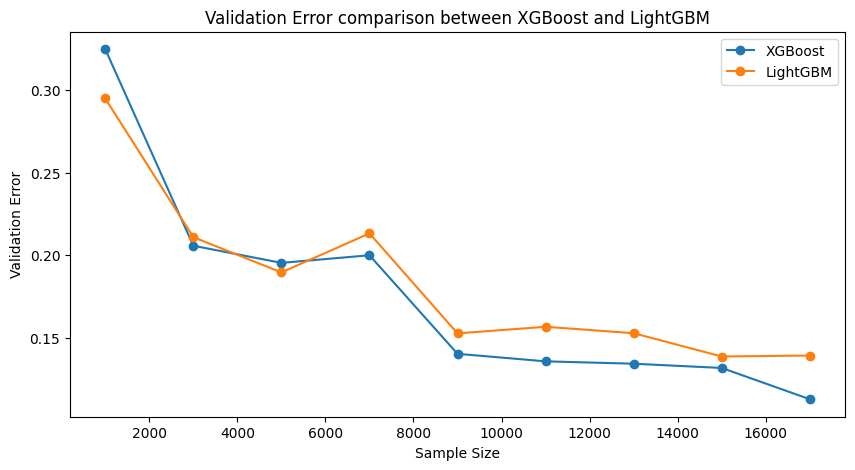

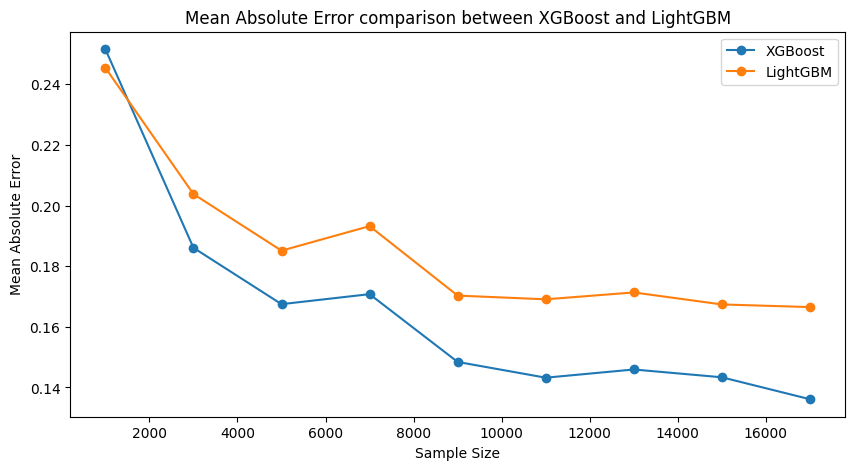

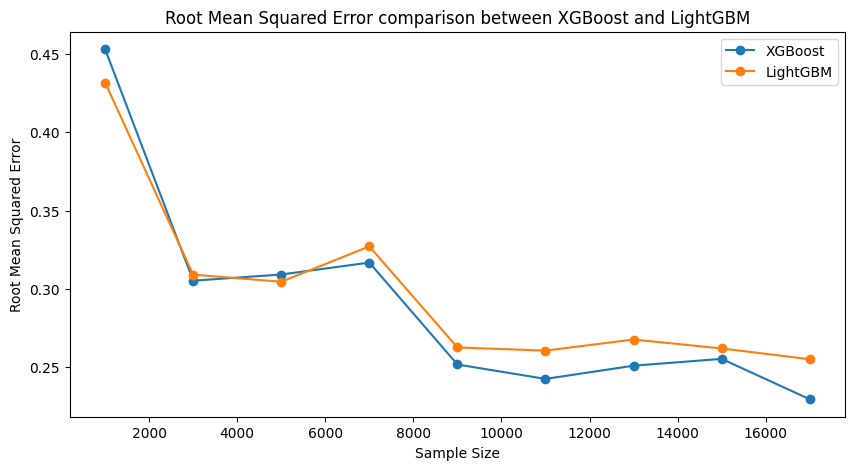

In [ ]:
# configuration
min_samples = 1000
max_samples = X_train.shape[0]
step = 2000

# Dictionaries to store metrics
xgb_metrics = {"sample_size": [], "runtime": [], "mae": [], "rmse": [], "val_error": []}
lgbm_metrics = {"sample_size": [], "runtime": [], "mae": [], "rmse": [], "val_error": []}

for sample_size in tqdm(range(min_samples, max_samples, step)):
    xgb = XGBRegressor(random_state=42, max_depth=6, n_jobs=-1)
    lgbm = LGBMRegressor(random_state=42, max_depth=5, n_jobs=-1)

    # Create subset of the data of custom sample size
    X_temp, _, y_temp, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=42)

    # Splitting the data into train/validation sets
    X_train_temp, X_val, y_train_temp, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

    # XGBoost
    start = time.time()
    xgb.fit(X_train_temp, y_train_temp)
    end = time.time()
    # Storing metrics
    xgb_metrics["runtime"].append(end-start)
    xgb_metrics["sample_size"].append(sample_size)
    predictions = xgb.predict(X_val)
    xgb_metrics["mae"].append(mean_absolute_error(y_val, predictions))
    xgb_metrics["rmse"].append(sqrt(mean_squared_error(y_val, predictions)))
    xgb_metrics["val_error"].append(1 - xgb.score(X_val, y_val))  # Error is 1 - score

    # LightGBM
    start = time.time()
    lgbm.fit(X_train_temp, y_train_temp)
    end = time.time()
    # Storing metrics
    lgbm_metrics["runtime"].append(end-start)
    lgbm_metrics["sample_size"].append(sample_size)
    predictions = lgbm.predict(X_val)
    lgbm_metrics["mae"].append(mean_absolute_error(y_val, predictions))
    lgbm_metrics["rmse"].append(sqrt(mean_squared_error(y_val, predictions)))
    lgbm_metrics["val_error"].append(1 - lgbm.score(X_val, y_val))  # Error is 1 - score

# Plot validation error comparison
plt.figure(figsize=(10, 5))
plt.plot(xgb_metrics["sample_size"], xgb_metrics["val_error"], marker='o', label='XGBoost')
plt.plot(lgbm_metrics["sample_size"], lgbm_metrics["val_error"], marker='o', label='LightGBM')
plt.xlabel('Sample Size')
plt.ylabel('Validation Error')
plt.title('Validation Error comparison between XGBoost and LightGBM')
plt.legend()
plt.show()

# Plot MAE comparison
plt.figure(figsize=(10, 5))
plt.plot(xgb_metrics["sample_size"], xgb_metrics["mae"], marker='o', label='XGBoost')
plt.plot(lgbm_metrics["sample_size"], lgbm_metrics["mae"], marker='o', label='LightGBM')
plt.xlabel('Sample Size')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error comparison between XGBoost and LightGBM')
plt.legend()
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(10, 5))
plt.plot(xgb_metrics["sample_size"], xgb_metrics["rmse"], marker='o', label='XGBoost')
plt.plot(lgbm_metrics["sample_size"], lgbm_metrics["rmse"], marker='o', label='LightGBM')
plt.xlabel('Sample Size')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error comparison between XGBoost and LightGBM')
plt.legend()
plt.show()

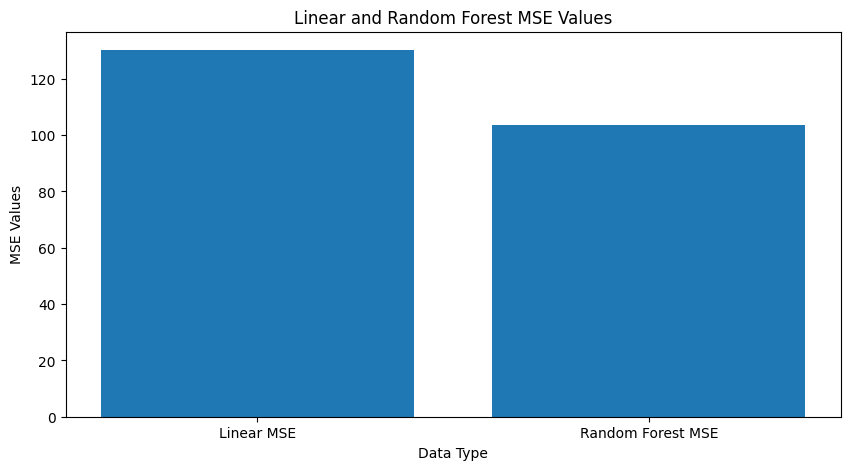

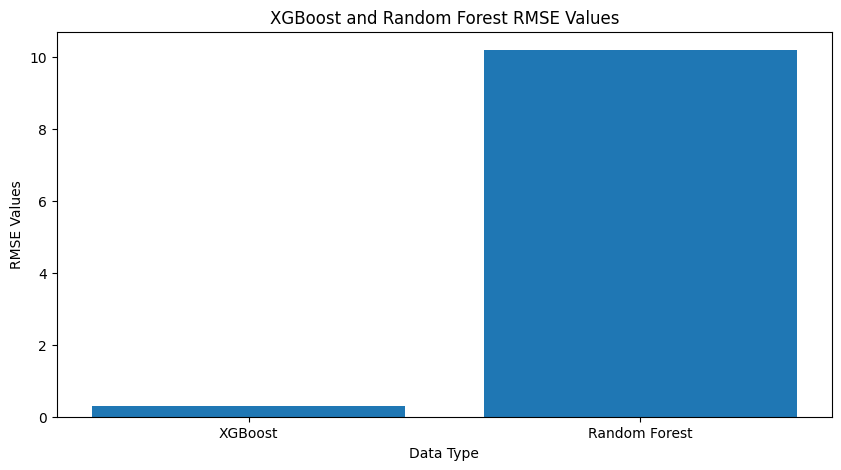

In [ ]:
plt.figure(figsize=(10, 5))
categories = ['Linear MSE', 'Random Forest MSE']
values = [mse_linear*1000, mse]
plt.bar(categories, values)
plt.xlabel('Data Type')
plt.ylabel('MSE Values')
plt.title('Linear and Random Forest MSE Values')
plt.show()
#XGBoost vs RF
plt.figure(figsize=(10, 5))
categories = ['XGBoost', 'Random Forest']
values = [sum(xgb_metrics["rmse"]) / len(xgb_metrics["rmse"]), mse**(0.5)]
plt.bar(categories, values)
plt.xlabel('Data Type')
plt.ylabel('RMSE Values')
plt.title('XGBoost and Random Forest RMSE Values')
plt.show()